In [52]:
#importing required libraries
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [53]:
#read the train and test dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Evaluation of the model
In this step, we will evaluate the model by using the standard metrics available in sklearn.metrics. The quality of our model shows how well its predictions match up against actual values. We will assess how well the model performs against the test data using a set of standard metrics that we have previously introduced.

In [67]:
def model_evalution(y_actual, y_predict):
    if isinstance(y_actual, np.ndarray):
        mae = np.abs(np.subtract(y_actual, y_predict)).mean()
        mse = np.square(np.subtract(y_actual, y_predict)).mean()
        rmse = math.sqrt(mse)
        y_mean = y_actual.mean()
        r2 = 1 - np.sum(np.square(np.subtract(y_actual, y_predict)))/np.sum(np.square(np.subtract(y_actual, y_mean)))
    else:
        mae = metrics.mean_absolute_error(y_actual, y_predict)
        mse = metrics.mean_squared_error(y_actual, y_predict)
        rmse = mse**0.5
        r2 = metrics.r2_score(y_actual, y_predict)
    return mae, mse, rmse, r2

In [4]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [5]:
# shape of the dataset
print(f'Shape of the training data: {train_data.shape}')
print(f'Shape of the texting data: {test_data.shape}')

Shape of the training data: (1364, 36)
Shape of the texting data: (341, 36)


# Train the Model

In [6]:
# Next, we need to predict the missing target variable in the test data.
# Target Variable = Item_Outlet_Sales

#separate the independent and target variable on training data

train_x = train_data.drop(columns = ['Item_Outlet_Sales'])
train_y = train_data['Item_Outlet_Sales']

In [7]:
#separate the independent and target variable on testing data

test_x = test_data.drop(columns = ['Item_Outlet_Sales'])
test_y = test_data['Item_Outlet_Sales']

In [8]:
'''
Create the object of the Linear Regression model
You can also add other parameters and test your code here
Some parameters are : fit_intercept and normalize
Documentation of sklearn LinearRegression: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

 '''

'\nCreate the object of the Linear Regression model\nYou can also add other parameters and test your code here\nSome parameters are : fit_intercept and normalize\nDocumentation of sklearn LinearRegression: \n\nhttps://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html\n\n '

In [9]:
model = LinearRegression()

In [10]:
# fit the model with the training data
model.fit(train_x, train_y)

LinearRegression()

In [11]:
# coefficients of the trained model
print(f'Coefficient of model: {model.coef_}')

Coefficient of model: [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]


In [12]:
# intercept of the model
print(f'Intercept of the model: {model.intercept_}')

Intercept of the model: -121926.97473297725


In [13]:
# predict the target on the test dataset
predict_train = model.predict(train_x)
print(f'Item_Outlet_Sales on training data: {predict_train}')

Item_Outlet_Sales on training data: [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [40]:
mae, mse, rmse, r2 = model_evalution(train_y, predict_train)
print("The model performance for training data")
print("--------------------------------------")
print(f'MAE is {mae:.2f}')
print(f'MSE is {mse:.2f}')
print(f'RMSE is {rmse:.2f}')
print(f'R2 score is {r2:.4f}')

<class 'pandas.core.series.Series'>
The model performance for training data
--------------------------------------
MAE is 847.06
MSE is 1290077.84
RMSE is 1135.82
R2 score is 0.5875


# TESTING

In [15]:
# predict the target on the testing dataset
predict_test = model.predict(test_x)

In [16]:
mae, mse, rmse, r2 = model_evalution(test_y, predict_test)
print("The model performance for testing data")
print("--------------------------------------")
print(f'MAE is {mae:.2f}')
print(f'MSE is {mse:.2f}')
print(f'RMSE is {rmse:.2f}')
print(f'R2 score is {r2:.4f}')

The model performance for testing data
--------------------------------------
MAE is 751.63
MSE is 1018589.04
RMSE is 1009.25
R2 score is 0.5592


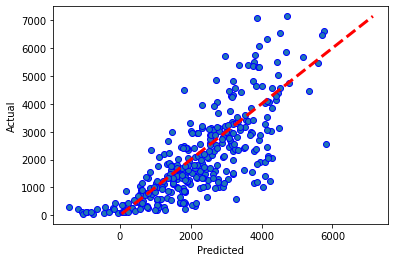

In [48]:
fig, ax = plt.subplots()
ax.scatter(predict_test, test_y, edgecolors=(0, 0, 1))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# NUMPY ARRAY and Normalisation

The most common function type you’ll use in this stage are standardizing functions, namely the MinMax and Standard functions. This is because features in your data will vary in range. However, nearly all ML algorithms use Euclidean distance to measure the distance between two data points.

In [110]:
# TRAIN
train_matrix = np.array(train_data)

In [111]:
X = train_matrix[:,:-2]
y = train_matrix[:,-1]

In [102]:
# Normalising using the MinMax
#X = (X -np.min(X))/(np.max(X) - np.min(X)) 

"""# or
import sklearn.preprocessing as preprocessing
minmax = preprocessing.MinMaxScaler()
# X is a matrix with float type
minmax.fit(X)
X = minmax.transform(X)"""

# Normalising using the Max
X = X/(np.max(X)) 


X_minmax.shape

(1364, 34)

In [112]:
# fit the model with the training data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [113]:
predict_train_n = model.predict(X)

In [114]:
mae, mse, rmse, r2 = model_evalution(y, predict_train_n)
print("The model performance for normalised training data")
print("---------------------------------------------------")
print(f'MAE is {mae:.4f}')
print(f'MSE is {mse:.4f}')
print(f'RMSE is {rmse:.4f}')
print(f'R2 score is {r2:.2%}')

The model performance for normalised training data
---------------------------------------------------
MAE is 0.0289
MSE is 0.0021
RMSE is 0.0460
R2 score is 97.71%


In [80]:
# TEST
test_matrix = np.array(test_data)
X = test_matrix[:,:-2]
y = test_matrix[:,-1]
X = X/(np.max(X)) 

In [81]:
X

array([[2.53405490e-03, 3.15374934e-06, 1.33016042e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.40003033e-04],
       [9.26120063e-04, 1.31007515e-05, 2.79225689e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.40003033e-04],
       [1.65903594e-03, 7.02629386e-06, 2.29818619e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.40003033e-04],
       ...,
       [1.80765960e-03, 3.36462065e-06, 1.74965990e-02, ...,
        1.40003033e-04, 0.00000000e+00, 0.00000000e+00],
       [1.42733092e-03, 1.76940165e-05, 1.57067443e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.40003033e-04],
       [2.05804459e-03, 1.01632224e-05, 6.79062311e-03, ...,
        1.40003033e-04, 0.00000000e+00, 0.00000000e+00]])

In [82]:
predict_test_n = model.predict(X)

In [83]:
mae, mse, rmse, r2 = model_evalution(y, predict_test_n)
print("The model performance for normalised testing data")
print("---------------------------------------------------")
print(f'MAE is {mae:.4f}')
print(f'MSE is {mse:.4f}')
print(f'RMSE is {rmse:.4f}')
print(f'R2 score is {r2:.2%}')

The model performance for normalised testing data
---------------------------------------------------
MAE is 65.5067
MSE is 4291.1971
RMSE is 65.5072
R2 score is -4333621.50%


# Using Cross Validation -  KFOLD

In [84]:
from sklearn import model_selection

In [85]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

In [86]:
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.035 (0.006)


In [87]:
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.003 (0.001)


In [88]:
scoring = 'r2'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.957 (0.038)
